# Гора Кирилл Алексеевич
## Лабораторная работа № 3.Регрессионный анализ данных.
### Цель лабораторной работы – получение навыков работы с методами регрессии.
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 


Кодировка классификаторов:

* 1 – линейная регрессия без использования регуляризаторов;
* 2 – линейная регрессия, LASSO регуляризатор;
* 3 – линейная регрессия, RIDGE регуляризатор;


### Вариант 5
#### Набор данных 2 "used_cars"
#### Классификаторы 1, 2 

#### 1. Иучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn as skl
from scipy.stats import pearsonr, spearmanr
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [115]:
data_cars = pd.read_csv ("autos.csv", encoding="ISO-8859-1")
data_cars

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


* dateCrawled -  дата ползла
* name - марка автомобиля 
* seller - продавец (данные о продавце - частный или диллер)
* offerType - тип оффера
* price - цена 
* abtest - 
* vehicleType - тип машины (купе, кабриолет и т.д.)
* yearOfRegistration - коробка передач
* powerPS - мощность автомобиля 
* model - модель
* kilometer - пробег
* monthOfRegistration - количество месяцев регистрации
* fuelType - тип топлива
* notRepairedDamage - есть ли не устраненный ущерб
* dateCreated - дата создания
* nrOfPictures - количество изображений
* postalCode - Почтовый индекс
* lastSeen - дата, когда последний раз просматривали

#### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [116]:
print("Длина набора до удаления дубликатов", len(data_cars))

Длина набора до удаления дубликатов 371528


In [117]:
#удалим сначала ненужные колонки, которые не несут нужной информации
data_cars = data_cars.dropna()
data_cars = data_cars.drop(['dateCrawled','offerType','dateCreated','postalCode','lastSeen','name','model'], axis = 1)

In [118]:
data_cars.drop_duplicates(keep='first',inplace = True)
print("После удаление дубликатов: %d" % len(data_cars))

После удаление дубликатов: 246385


#### 3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [119]:
data_cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures
count,2.463850e+05,246385.000000,246385.000000,246385.000000,246385.000000,246385.0
mean,8.321172e+03,2003.281981,126.360054,124016.173874,6.172985,0.0
std,3.533013e+05,6.546207,148.748481,39895.075272,3.472029,0.0
min,0.000000e+00,1910.000000,0.000000,5000.000000,0.000000,0.0
25%,1.500000e+03,1999.000000,79.000000,100000.000000,3.000000,0.0
50%,3.800000e+03,2004.000000,116.000000,150000.000000,6.000000,0.0
75%,8.650000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0
max,1.000000e+08,2018.000000,20000.000000,150000.000000,12.000000,0.0


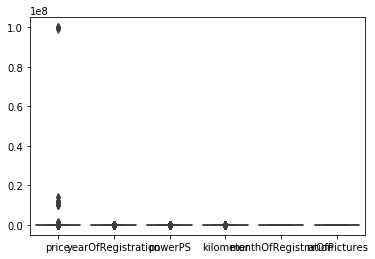

In [120]:
categorical_columns = [column for column in data_cars.columns if data_cars[column].dtype.name == 'object']
numerical_columns   = [column for column in data_cars.columns if data_cars[column].dtype.name != 'object']
sns.boxplot(data = data_cars[numerical_columns])

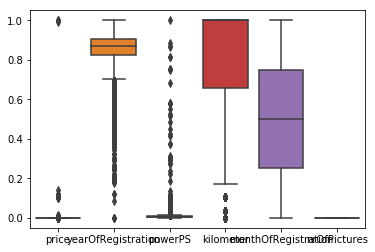

In [132]:
data_cars[numerical_columns] = preprocessing.MinMaxScaler().fit_transform(data_cars[numerical_columns].values.astype(float))#Масштабируем нормализацией 
sns.boxplot(data = data_cars[numerical_columns])

#### 4.Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [122]:
categorical_columns = [i for i in data_cars.columns if data_cars[i].dtype.name == 'object']

In [123]:
print (f"Категориальные признаки: {categorical_columns}")

Категориальные признаки: ['seller', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']


In [124]:
#найдем все бинарные признаки
nonbinary = [column for column in categorical_columns if len(data_cars[column].unique()) > 2]
#заменим все бинарные признаки на 0 и 1 
for column in [column for column in categorical_columns if len(data_cars[column].unique()) == 2]:
    for i, unic_item in enumerate(data_cars[column].unique()):
        data_cars[column] = data_cars[column].replace(to_replace=[unic_item], value=[i])
#к небинарным признакам примим dummy кодирование
data_nonbinary = pd.get_dummies(data_cars[nonbinary])
data_cars.drop(nonbinary, axis=1, inplace=True)
data_cars = pd.concat([data_nonbinary, data_cars] , axis=1)
print(data_cars.shape)
data_cars.head()

(246385, 64)


,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,...,seller,price,abtest,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage,nrOfPictures
3,0,0,0,0,1,0,0,0,0,1,...,0,1500,0,2001,0,75,150000,6,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,3600,0,2008,0,69,90000,7,0,0
5,0,0,0,0,0,0,1,0,0,1,...,0,650,0,1995,0,102,150000,10,1,0
6,0,0,1,0,0,0,0,0,0,1,...,0,2200,0,2004,0,109,150000,8,0,0
7,0,0,0,0,0,0,1,0,0,1,...,0,0,0,1980,0,50,40000,7,0,0


#### 5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

In [125]:
corr_matrix = data_cars.corr()
print(corr_matrix)

                        vehicleType_andere  vehicleType_bus  \
vehicleType_andere                1.000000        -0.027470   
vehicleType_bus                  -0.027470         1.000000   
vehicleType_cabrio               -0.023349        -0.090601   
vehicleType_coupe                -0.020639        -0.080084   
vehicleType_kleinwagen           -0.045447        -0.176348   
vehicleType_kombi                -0.042624        -0.165393   
vehicleType_limousine            -0.054070        -0.209806   
vehicleType_suv                  -0.018485        -0.071729   
fuelType_andere                   0.018457        -0.003972   
fuelType_benzin                  -0.029728        -0.216646   
fuelType_cng                      0.004482         0.053218   
fuelType_diesel                   0.029889         0.214040   
fuelType_elektro                  0.008399        -0.004010   
fuelType_hybrid                  -0.000773        -0.007122   
fuelType_lpg                     -0.004102         0.00

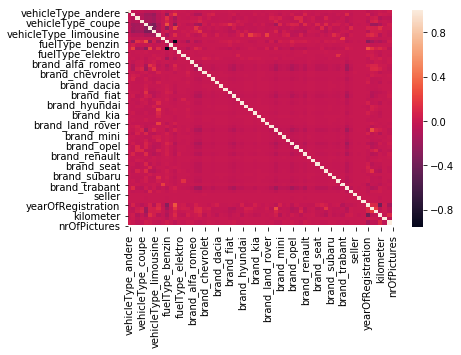

In [126]:
sns.heatmap(corr_matrix)

#### 6. Заполните пропущенные значения в данных;

In [127]:
data_cars.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246385 entries, 3 to 371527
Data columns (total 64 columns):
vehicleType_andere        246385 non-null uint8
vehicleType_bus           246385 non-null uint8
vehicleType_cabrio        246385 non-null uint8
vehicleType_coupe         246385 non-null uint8
vehicleType_kleinwagen    246385 non-null uint8
vehicleType_kombi         246385 non-null uint8
vehicleType_limousine     246385 non-null uint8
vehicleType_suv           246385 non-null uint8
fuelType_andere           246385 non-null uint8
fuelType_benzin           246385 non-null uint8
fuelType_cng              246385 non-null uint8
fuelType_diesel           246385 non-null uint8
fuelType_elektro          246385 non-null uint8
fuelType_hybrid           246385 non-null uint8
fuelType_lpg              246385 non-null uint8
brand_alfa_romeo          246385 non-null uint8
brand_audi                246385 non-null uint8
brand_bmw                 246385 non-null uint8
brand_chevrolet          

Пропущенных данных нет

#### 7.Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

##### 1. линейная регрессия без использования регуляризаторов;

In [128]:
data_x, data_y = data_cars.drop(['price'], axis=1), data_cars['price']
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.3, random_state = 123)
reg = LinearRegression()
reg.fit(train_x, train_y)
pred_reg = reg.predict(test_x)
print(pred_reg[:15] - test_y[:15])

55047     -1270.137649
74300      1355.580215
26580     -2632.164459
198933      999.361223
118142    -3917.175416
148869     4476.233724
368730     1498.113119
59375      5260.265582
338033     4219.960157
208567    14770.657105
4516       4741.782713
168315      102.180440
14098     -5713.033813
230127     5662.063019
4736      -3602.752173
Name: price, dtype: float64


In [129]:
P, p_value_P = pearsonr(pred_reg, test_y)
S, p_value_S = spearmanr(pred_reg, test_y)
print(f"Корреляция Пирсона: {P} p_value: {p_value_P}\nКореляция Спирмана: {S} p_value: {p_value_S}")

Корреляция Пирсона: 0.015101849203481862 p_value: 4.0260517358845534e-05
Кореляция Спирмана: 0.6664625858655381 p_value: 0.0


#### 2.линейная регрессия, LASSO регуляризатор

In [130]:
lasso = Lasso(alpha=0.1)
lasso.fit(train_x,train_y)
pred_reg = lasso.predict(X = test_x)
print(pred_reg[:15] - test_y[:15])

55047     -1269.582680
74300      1352.897358
26580     -2636.799490
198933      999.401571
118142    -3898.710540
148869     4473.980759
368730     1495.339446
59375      5258.802307
338033     4215.548455
208567    14770.804497
4516       4739.891559
168315      112.474865
14098     -5700.043078
230127     5645.084738
4736      -3601.609820
Name: price, dtype: float64


In [131]:
P, p_value_P = pearsonr(pred_reg, y_test)
S, p_value_S = spearmanr(pred_reg, y_test)
print(f"Корреляция Пирсона: {P} p_value: {p_value_P}\nКореляция Спирмана: {S} p_value: {p_value_S}")

Корреляция Пирсона: 0.015103249403831374 p_value: 4.0194245835206706e-05
Кореляция Спирмана: 0.666534721001059 p_value: 0.0
